In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon

In [2]:
data = pd.read_csv('exp_data.csv')
survey = pd.read_csv('exit_survey.csv')

In [3]:
data.head()

,NAME,CONDITION (P/NP),"CONDITION (NM,M/ M,NM)",Unnamed: 3,ASSIGNED GENRE,TIME 1st LAP,TIME 2nd LAP
0,Saloni Agrawal,P,"NM, M",NaN,Hip-Hop,2:11,2:10
1,Sreejith Santhosh,P,"M, NM",NaN,Hip-Hop,1:52,1:41
2,Aries Cole,P,"NM, M",NaN,Hip-Hop,1:45,1:51
3,Baden Gloyer,NP,"M, NM",NaN,Pop,2:33,2:40
4,Andy Ho,P,"M, NM",NaN,Pop,1:57,1:59


In [4]:
survey.head()

,name,ex_first,ex_second
0,Saloni Agrawal,5,4
1,Sreejith Santhosh,5,4
2,Baden Gloyer,5,5
3,Jordi Pham,3,6
4,Nitika Suresh,8,8


In [5]:
data = pd.read_csv('exp_data.csv')
#drop empty col
data = data.drop(columns=['Unnamed: 3'])
# rename columns to something easiere
cols = ['name', 'cond_pref', 'cond_order', 'genre', 'time_first', 'time_second']
data.columns = cols
# change preference and music first lap into booleans
# data = data.assign(pref_bool=(data['cond_pref'] == 'P')).assign(music_first_bool=(data['cond_order']=='M, NM'))
data = data.assign(pref_bool=(data['cond_pref'] == 'P'))
data['first_cond'] = data['cond_order'].apply(lambda x: 'Music' if x[0]=='M' else 'No Music')
# get relevant columns
data = data[['name', 'pref_bool', 'first_cond', 'genre', 'time_first', 'time_second']]

data.head()

,name,pref_bool,first_cond,genre,time_first,time_second
0,Saloni Agrawal,True,No Music,Hip-Hop,2:11,2:10
1,Sreejith Santhosh,True,Music,Hip-Hop,1:52,1:41
2,Aries Cole,True,No Music,Hip-Hop,1:45,1:51
3,Baden Gloyer,False,Music,Pop,2:33,2:40
4,Andy Ho,True,Music,Pop,1:57,1:59


In [6]:
def time_to_seconds(time_str):
    # Split the time string by ":"
    minutes, seconds = map(int, time_str.split(':'))
    # Convert to total seconds
    total_seconds = minutes * 60 + seconds
    return total_seconds

In [7]:
# convert times into seconds
data['time_first'] = data['time_first'].transform(time_to_seconds)
data['time_second'] = data['time_second'].transform(time_to_seconds)

data.head()

,name,pref_bool,first_cond,genre,time_first,time_second
0,Saloni Agrawal,True,No Music,Hip-Hop,131,130
1,Sreejith Santhosh,True,Music,Hip-Hop,112,101
2,Aries Cole,True,No Music,Hip-Hop,105,111
3,Baden Gloyer,False,Music,Pop,153,160
4,Andy Ho,True,Music,Pop,117,119


In [8]:
# merge times and participant experience
all_data = data.merge(survey, on='name')
all_data.head()

,name,pref_bool,first_cond,genre,time_first,time_second,ex_first,ex_second
0,Saloni Agrawal,True,No Music,Hip-Hop,131,130,5,4
1,Aries Cole,True,No Music,Hip-Hop,105,111,7,4
2,Baden Gloyer,False,Music,Pop,153,160,5,5
3,Andy Ho,True,Music,Pop,117,119,9,10
4,Jordi Pham,False,Music,Classical,94,89,3,6


In [9]:
(all_data
 .groupby(['pref_bool', 'first_cond'])[['time_first', 'time_second']]
 .mean().diff(axis=1))

time_first  time_second
pref_bool first_cond                         
False     Music              NaN     2.714286
          No Music           NaN     4.750000
True      Music              NaN     2.500000
          No Music           NaN     2.666667

In [10]:
# making a df just putting times in accordance to music/no music
times_df = all_data.copy()
times_df["lap_no_music"] = times_df.apply(lambda row: row["time_first"] if row["first_cond"] == "No Music" else row["time_second"], axis=1)
times_df["lap_music"] = times_df.apply(lambda row: row["time_second"] if row["first_cond"] == "No Music" else row["time_first"], axis=1)

times_df["ex_music"] = times_df.apply(lambda row: row["ex_first"] if row["first_cond"] == "Music" else row["ex_second"], axis=1)
times_df["ex_no_music"] = times_df.apply(lambda row: row["ex_second"] if row["first_cond"] == "Music" else row["ex_first"], axis=1)

# Display the updated DataFrame
print(times_df)

                      name  pref_bool first_cond      genre  time_first  \
0           Saloni Agrawal       True   No Music    Hip-Hop         131   
1               Aries Cole       True   No Music    Hip-Hop         105   
2             Baden Gloyer      False      Music        Pop         153   
3                  Andy Ho       True      Music        Pop         117   
4               Jordi Pham      False      Music  Classical          94   
5            Nitika Suresh       True      Music        Pop         104   
6           Camille Aquino      False   No Music       Rock          97   
7        Olivia Van Houten      False   No Music  Classical          98   
8            Alex Odintsov      False      Music  Classical          98   
9            Jorge Vergara       True   No Music       Rock          99   
10  Krystalei Delos Santos       True      Music        Pop          93   
11           Ann Rae Dizon      False      Music       Rock          75   
12            David Medin

In [11]:
times_df.drop(['ex_first','ex_second'],axis=1)

,name,pref_bool,first_cond,genre,time_first,time_second,lap_no_music,lap_music,ex_music,ex_no_music
0,Saloni Agrawal,True,No Music,Hip-Hop,131,130,131,130,4,5
1,Aries Cole,True,No Music,Hip-Hop,105,111,105,111,4,7
2,Baden Gloyer,False,Music,Pop,153,160,160,153,5,5
3,Andy Ho,True,Music,Pop,117,119,119,117,9,10
4,Jordi Pham,False,Music,Classical,94,89,89,94,3,6
5,Nitika Suresh,True,Music,Pop,104,112,112,104,8,8
6,Camille Aquino,False,No Music,Rock,97,94,97,94,9,8
7,Olivia Van Houten,False,No Music,Classical,98,106,98,106,3,5
8,Alex Odintsov,False,Music,Classical,98,102,102,98,4,2
9,Jorge Vergara,True,No Music,Rock,99,106,99,106,9,7


In [12]:
times_df.head()

,name,pref_bool,first_cond,genre,time_first,time_second,ex_first,ex_second,lap_no_music,lap_music,ex_music,ex_no_music
0,Saloni Agrawal,True,No Music,Hip-Hop,131,130,5,4,131,130,4,5
1,Aries Cole,True,No Music,Hip-Hop,105,111,7,4,105,111,4,7
2,Baden Gloyer,False,Music,Pop,153,160,5,5,160,153,5,5
3,Andy Ho,True,Music,Pop,117,119,9,10,119,117,9,10
4,Jordi Pham,False,Music,Classical,94,89,3,6,89,94,3,6


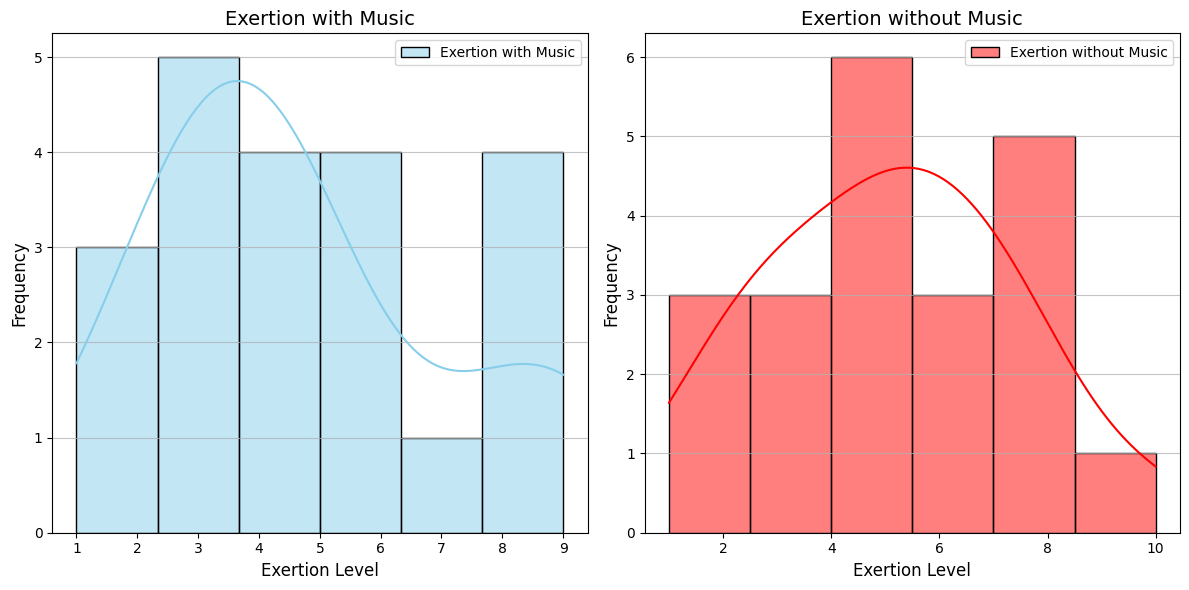

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Histogram for ex_music
sns.histplot(times_df['ex_music'], color="skyblue", label="Exertion with Music", kde=True, ax=axes[0])
axes[0].set_xlabel("Exertion Level", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title("Exertion with Music", fontsize=14)
axes[0].grid(axis='y', alpha=0.75)
axes[0].legend()

# Histogram for ex_no_music
sns.histplot(times_df['ex_no_music'], color="red", label="Exertion without Music", kde=True, ax=axes[1])
axes[1].set_xlabel("Exertion Level", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Exertion without Music", fontsize=14)
axes[1].grid(axis='y', alpha=0.75)
axes[1].legend()

plt.tight_layout() # Prevent overlap
plt.show()

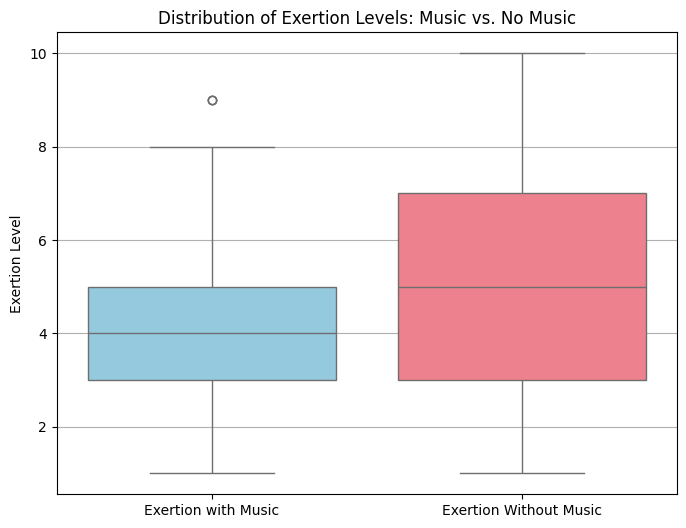

In [14]:
# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(data=times_df[['ex_music', 'ex_no_music']], palette=['skyblue','#FF6F7F'])
plt.ylabel("Exertion Level")
plt.xticks(ticks=[0, 1], labels=["Exertion with Music", "Exertion Without Music"])  # Label the boxes
plt.title("Distribution of Exertion Levels: Music vs. No Music")
plt.grid(axis='y')
plt.show()

In [15]:
# Statistic tests to figure out if music had a significant effect on exertion level 

# Paired t-test
t_stat, p_value = ttest_rel(times_df['ex_music'], times_df['ex_no_music'])
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Wilcoxon Signed-Rank test
w_stat, p_value_wilcoxon = wilcoxon(times_df['ex_music'], times_df['ex_no_music'])
print(f"Wilcoxon signed-rank test: W-statistic = {w_stat}, p-value = {p_value_wilcoxon}")

Paired t-test: t-statistic = -1.0132205927544846, p-value = 0.3230564888924736
Wilcoxon signed-rank test: W-statistic = 63.0, p-value = 0.32069222468986036


In [16]:
# Testing whether, for those who ran with no music first, there's a significant difference in their exertion level between their first and 
# second lap. 
# If the value is significant, it shows that the order the people ran in, made a difference.




# Separate data into groups based on first_cond
no_music_group = all_data[all_data["first_cond"] == "No Music"]
music_group = all_data[all_data["first_cond"] == "Music"]

# Paired t-test for 'No Music' group
t_stat_no_music, p_value_no_music = ttest_rel(no_music_group["ex_first"], no_music_group["ex_second"])
print(f"No Music Group - Paired t-test: t-statistic = {t_stat_no_music}, p-value = {p_value_no_music}")

# Paired t-test for 'Music' group
t_stat_music, p_value_music = ttest_rel(music_group["ex_first"], music_group["ex_second"])
print(f"Music Group - Paired t-test: t-statistic = {t_stat_music}, p-value = {p_value_music}")

# Wilcoxon signed-rank test
if len(no_music_group) > 0:
    w_stat_no_music, p_value_no_music_wilcoxon = wilcoxon(no_music_group["ex_first"], no_music_group["ex_second"])
    print(f"No Music Group - Wilcoxon test: W-statistic = {w_stat_no_music}, p-value = {p_value_no_music_wilcoxon}")

if len(music_group) > 0:
    w_stat_music, p_value_music_wilcoxon = wilcoxon(music_group["ex_first"], music_group["ex_second"])
    print(f"Music Group - Wilcoxon test: W-statistic = {w_stat_music}, p-value = {p_value_music_wilcoxon}")


No Music Group - Paired t-test: t-statistic = 2.3434003976548294, p-value = 0.04377578392954618
Music Group - Paired t-test: t-statistic = 0.45124262819714017, p-value = 0.6614423061960362
No Music Group - Wilcoxon test: W-statistic = 9.0, p-value = 0.064453125
Music Group - Wilcoxon test: W-statistic = 15.5, p-value = 0.7233417590035842


In [17]:
times_df.head()

,name,pref_bool,first_cond,genre,time_first,time_second,ex_first,ex_second,lap_no_music,lap_music,ex_music,ex_no_music
0,Saloni Agrawal,True,No Music,Hip-Hop,131,130,5,4,131,130,4,5
1,Aries Cole,True,No Music,Hip-Hop,105,111,7,4,105,111,4,7
2,Baden Gloyer,False,Music,Pop,153,160,5,5,160,153,5,5
3,Andy Ho,True,Music,Pop,117,119,9,10,119,117,9,10
4,Jordi Pham,False,Music,Classical,94,89,3,6,89,94,3,6


In [18]:


# Split data into groups
preferred_group = times_df[times_df["pref_bool"] == True]["lap_music"]
non_preferred_group = times_df[times_df["pref_bool"] == False]["lap_music"]

# Perform independent t-test
t_stat, p_value = ttest_ind(preferred_group, non_preferred_group, equal_var=False)
print(f"Independent t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_u = mannwhitneyu(preferred_group, non_preferred_group, alternative="two-sided")
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_value_u}")


Independent t-test: t-statistic = 0.3692446327337602, p-value = 0.7162657838881588
Mann-Whitney U test: U-statistic = 64.0, p-value = 0.5483005277790967


In [19]:
times_df.head()

,name,pref_bool,first_cond,genre,time_first,time_second,ex_first,ex_second,lap_no_music,lap_music,ex_music,ex_no_music
0,Saloni Agrawal,True,No Music,Hip-Hop,131,130,5,4,131,130,4,5
1,Aries Cole,True,No Music,Hip-Hop,105,111,7,4,105,111,4,7
2,Baden Gloyer,False,Music,Pop,153,160,5,5,160,153,5,5
3,Andy Ho,True,Music,Pop,117,119,9,10,119,117,9,10
4,Jordi Pham,False,Music,Classical,94,89,3,6,89,94,3,6


/var/folders/7r/dyjn5gtx12d21k4msl4lhlv80000gn/T/ipykernel_12675/2392285327.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pref_bool', y='time', data=melted_df, palette=['#4CC9F0','#F72585'])


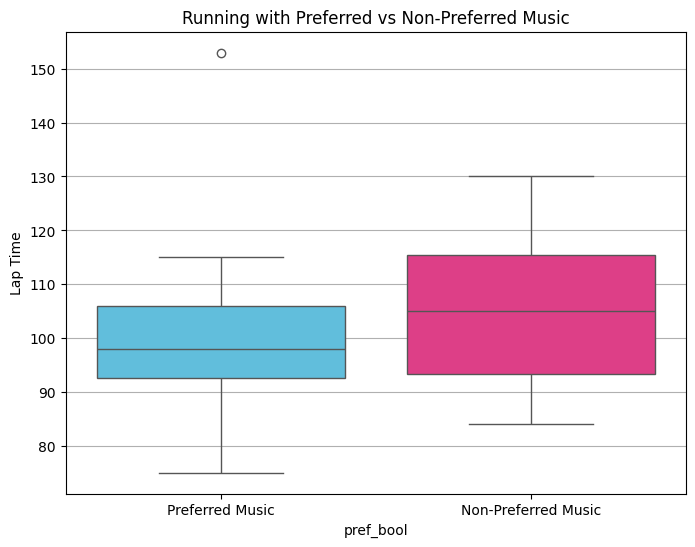

In [39]:
# graphing differnce in lap time for preferred and not preferred music 

melted_df = pd.melt(times_df, id_vars=['pref_bool'], value_vars=['lap_music'], var_name='lap', value_name='time')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='pref_bool', y='time', data=melted_df, palette=['#4CC9F0','#F72585'])

plt.ylabel("Lap Time")
plt.xticks(ticks=[0, 1], labels=["Preferred Music", "Non-Preferred Music"])
plt.title("Running with Preferred vs Non-Preferred Music")
plt.grid(axis='y')
plt.show()
